# **Задание 3. Гершбаум С.**
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_main = pd.read_csv('/content/tarantino.csv')

df = data_main.copy()
df.head()

,movie,type,word,minutes_in
0,Reservoir Dogs,word,dick,0.40
1,Reservoir Dogs,word,dicks,0.43
2,Reservoir Dogs,word,fucked,0.55
3,Reservoir Dogs,word,fucking,0.61
4,Reservoir Dogs,word,bullshit,0.61


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   movie       1894 non-null   object 
 1   type        1894 non-null   object 
 2   word        1704 non-null   object 
 3   minutes_in  1894 non-null   float64
dtypes: float64(1), object(3)
memory usage: 59.3+ KB


In [4]:
', '.join(df['type'].unique())

'word, death'

In [5]:
df['word'].isnull().sum()

190

У нас есть датасет с фильмами Квентина Тарантино, для каждого из которых записаны события (резкие высказывания, смерть персонажа),  и их тайминг:
- **`movie`** - название фильма
- **`type`** - тип события: ругательство или смерть
- **`word`** - конкретное ругательство, если событие - слово
- **`minutes_in`** - время по фильму, когда произошло событие

Как бы никогда не выразился Марк aka "Огузок" Богатырев: "Поработаем с Тарантино!"

---
**1.** Изучим число ругательств, летальных исходов и их соотношение по фильмам.

In [6]:
# сначала сгруппируем наш датафрейм по фильмам и подсчитаем события
num_of_events = df.groupby(['movie', 'type']).size().unstack(fill_value=0)

num_of_events = num_of_events.reset_index()

# переименуем столбцы для наглядности
num_of_events.columns = ['Movie', 'Number of deaths', 'Number of profane words']

# добавим столбец с соотношением числа смертей к числу ругательств
num_of_events['Word-death ratio'] = (num_of_events['Number of profane words'] / num_of_events['Number of deaths']).round(3)

# и добавим столбец с суммой всех событий для каждого фильма
num_of_events['Total events'] = num_of_events['Number of deaths'] + num_of_events['Number of profane words']

# отсортируем по сумме событий
num_of_events_sorted = num_of_events.sort_values(by='Total events', ascending=False).reset_index(drop=True)

# к датафрейму добавим итоговую строчку по всем фильмам
total = pd.DataFrame(num_of_events_sorted[['Number of deaths', 'Number of profane words', 'Word-death ratio', 'Total events']].sum()).transpose()
total['Movie'] = 'Total'

# для соотношения word-death в итоговой строчке перепишем корректное значение
total['Word-death ratio'] = (total['Number of profane words'] / total['Number of deaths']).round(3)

# присоединим наш total к датафрейму
num_of_events_final = pd.concat([num_of_events_sorted, total], ignore_index=True)

# для наглядности уберем у total'а индекс
num_of_events_final.index = num_of_events_final.index.map(lambda x: '' if x == num_of_events_final.index[-1] else x)

num_of_events_final

,Movie,Number of deaths,Number of profane words,Word-death ratio,Total events
0,Pulp Fiction,7.0,469.0,67.000,476.0
1,Reservoir Dogs,10.0,421.0,42.100,431.0
2,Jackie Brown,4.0,368.0,92.000,372.0
3,Django Unchained,47.0,262.0,5.574,309.0
4,Kill Bill: Vol. 1,63.0,57.0,0.905,120.0
5,Inglorious Basterds,48.0,58.0,1.208,106.0
6,Kill Bill: Vol. 2,11.0,69.0,6.273,80.0
,Total,190.0,1704.0,8.968,1894.0


В "Криминальном чтиве" нецензурных выражений и смертей в сумме больше, чем в остальных фильмах (476). А во второй части "Убить Билла" их наимееньшее количество - 80 событий. Крепко выражаются чаще всего в том же "Криминальном чтиве" - 469 раз, реже всего - в первой части "Убить Билла" (57 ругательств). Это единственный фильм среди представленных, в котором истеканий кровью больше, чем обзывательств - 63 на 57. Меньше всего убийств в "Джеки Брауне" - 4 (тут Квентин поскупился). Здесь соотношение матюканий и смертей самое высокое - 368 к 4.

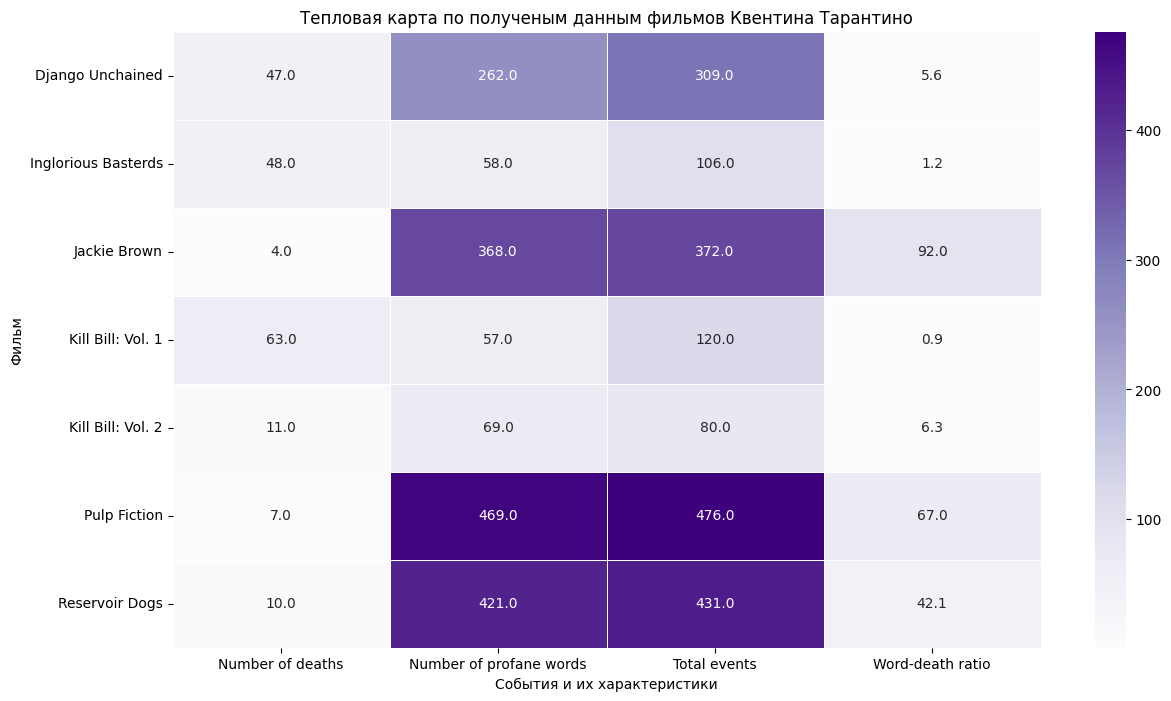

In [16]:
plt.figure(figsize=(14, 8))
sns.heatmap(
    num_of_events[['Number of deaths', 'Number of profane words', 'Total events', 'Word-death ratio']].set_index(num_of_events['Movie']),
    annot=True,
    fmt=".1f",
    cmap='Purples',
    linewidths=0.5
)
plt.title('Тепловая карта по полученым данным фильмов Квентина Тарантино')
plt.xlabel('События и их характеристики')
plt.ylabel('Фильм')
plt.show()

---
**2.** Посмотрим на частоту употребления каждого из ругательств. Взглянем на красоту:

In [8]:
unique_profane_words = list(df['word'].dropna().unique())

unique_profane_words

['dick',
 'dicks',
 'fucked',
 'fucking',
 'bullshit',
 'fuck',
 'shit',
 'motherfucker',
 'pussy',
 'fucks',
 'hell',
 'jap',
 'bastard',
 'goddamn',
 'motherfuckers',
 'asshole',
 'ass',
 'assholes',
 'n-word ',
 'asses',
 'bitch',
 'fuckup',
 'fucker',
 'shitty',
 'asshead',
 'damn',
 'damned',
 'bitches',
 'wetback',
 'faggot',
 'cocksucker',
 'gook',
 'fuckers',
 'gooks',
 'motherfucking',
 'dickless',
 'chickenshit',
 'slope',
 'fuckhead',
 'merde',
 'shithead',
 'cunt',
 'cunts',
 'fuckface',
 'cockblockery',
 'japs',
 'jew (verb)',
 'bastards',
 'horeshit',
 'shitless',
 'shitting',
 'negro ',
 'squaw',
 'slut',
 'goddamned',
 'jackass',
 'horseshit',
 'shittiest',
 'shitload',
 'dumbass']

Некоторые слова употребляются как в единственном, так и во множественном числе. Их можно объединить в одну группу по типу 'word(s)'. Проделаем для этого пару операций:

In [9]:
# функция для обьединения слов по изложенной логике
def grouping_words(word):

    # если событие = 'death', в столбце 'word' будет NaN, поэтому проверяем, является ли значение строкой
    if isinstance(word, str):

        # для слов с окончанием 's'
        if word[-1] == 's' and word[:-1] in unique_profane_words:
            return f"{word[:-1]}(s)"

        # для слов без окончания, но которые есть с окончанием 's'
        elif (word + 's') in unique_profane_words:
            return f"{word}(s)"

        # для слов с окончанием 'es'
        elif word[-2:] == 'es' and word[:-2] in unique_profane_words:
            return f"{word[:-2]}(es)"

        # для слов без окончания, но которые есть с окончанием 'es'
        elif (word + 'es') in unique_profane_words:
            return f"{word}(es)"

        else:
            return word
    else:
        return word


# создаем новый столбец, применяя функцию 'grouping_words' к столбцу 'word'
df['generalized_word'] = df['word'].apply(grouping_words)

# для проверки
df.head(10)

,movie,type,word,minutes_in,generalized_word
0,Reservoir Dogs,word,dick,0.40,dick(s)
1,Reservoir Dogs,word,dicks,0.43,dick(s)
2,Reservoir Dogs,word,fucked,0.55,fucked
3,Reservoir Dogs,word,fucking,0.61,fucking
4,Reservoir Dogs,word,bullshit,0.61,bullshit
5,Reservoir Dogs,word,fuck,0.66,fuck(s)
6,Reservoir Dogs,word,shit,0.90,shit
7,Reservoir Dogs,word,fuck,1.43,fuck(s)
8,Reservoir Dogs,word,dicks,1.56,dick(s)
9,Reservoir Dogs,word,fuck,1.66,fuck(s)


Посмотрим, как часто используется каждое из матюков в предложенных фильмах Тарантино:

In [10]:
profane_words_count = (df['generalized_word'].value_counts()).reset_index()
profane_words_count.columns = ['Profane word', 'Count']

profane_words_count

,Profane word,Count
0,fucking,407
1,shit,221
2,fuck(s),216
3,n-word,179
4,ass(es),144
5,goddamn,113
6,motherfucker(s),85
7,bitch(es),73
8,hell,45
9,damn,37


Топ-5 предельно ясен. Посмотрим на распределение словечек по каждому из фильмов:

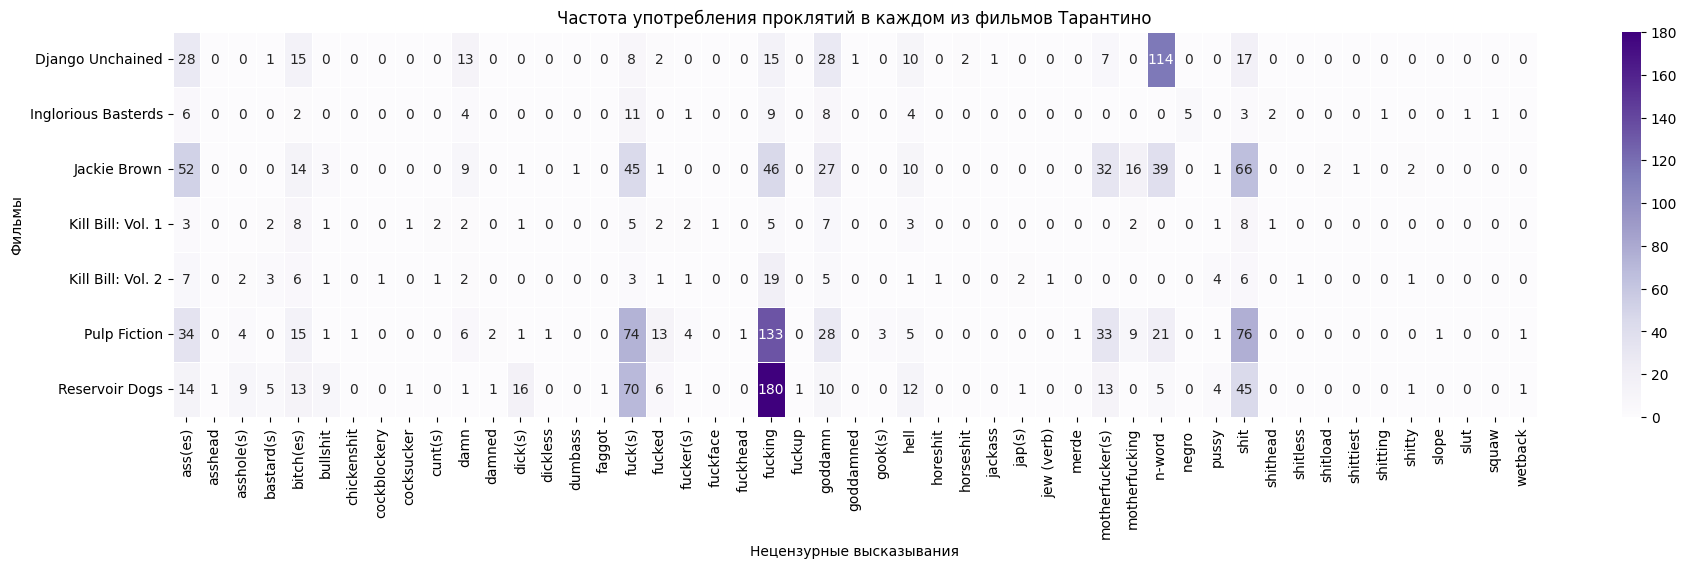

In [11]:
# построим хитмэп, сначала таблица
word_by_movie = pd.crosstab(df['movie'], df['generalized_word'])

plt.figure(figsize=(22,5))

sns.heatmap(word_by_movie, annot=True, cmap='Purples', linewidths=0.5, fmt='.0f')

plt.title('Частота употребления проклятий в каждом из фильмов Тарантино')
plt.xlabel('Нецензурные высказывания')
plt.ylabel('Фильмы')
plt.show()

Ну что можно сказать. С "Криминальным чтивом" мы разобрались, но в "Бешеных псах" мужики тоже дали жару! По распределению словечек в "Джанго освобожденном" тоже все понятно.

---
**3.** Определим распределение времени между проклятиями.

In [12]:
# оставляем в датафрейме только строчки с ругательствами
df_by_profane_words = df[df['type'] == 'word']

# перестрахуемся и отсортируем строки по назанию фильма и времени, когда было произнесено проклятие
df_by_profane_words = df_by_profane_words.sort_values(by=['movie', 'minutes_in'])

# для каждого из фильмов вычислим интервалы между ругательствами -> группируем по 'movie' и вычисляем разницу для 'minutes_in'
df_by_profane_words['word_diff'] = df_by_profane_words.groupby('movie')['minutes_in'].diff()

df_by_profane_words.head()

,movie,type,word,minutes_in,generalized_word,word_diff
1213,Django Unchained,word,goddamn,7.23,goddamn,NaN
1215,Django Unchained,word,goddamn,8.37,goddamn,1.14
1216,Django Unchained,word,bitch,8.38,bitch(es),0.01
1217,Django Unchained,word,damn,8.65,damn,0.27
1218,Django Unchained,word,fucking,8.87,fucking,0.22


Для каждого из фильмов первым значением в столбце **`word_diff`** будет NaN. Поскольку нам нужны интервалы, эти строки можно удалить:

In [13]:
# удаляем только те строки, где NaN - в столбце 'word-diff'
df_by_profane_words = df_by_profane_words.dropna(subset=['word_diff'])

df_by_profane_words.head()

,movie,type,word,minutes_in,generalized_word,word_diff
1215,Django Unchained,word,goddamn,8.37,goddamn,1.14
1216,Django Unchained,word,bitch,8.38,bitch(es),0.01
1217,Django Unchained,word,damn,8.65,damn,0.27
1218,Django Unchained,word,fucking,8.87,fucking,0.22
1219,Django Unchained,word,damn,8.88,damn,0.01


Для разнообразия визуального представления данных попробуем применить `stripplot` - точечный график, в данном случае каждая точка - нецензурное выражение.

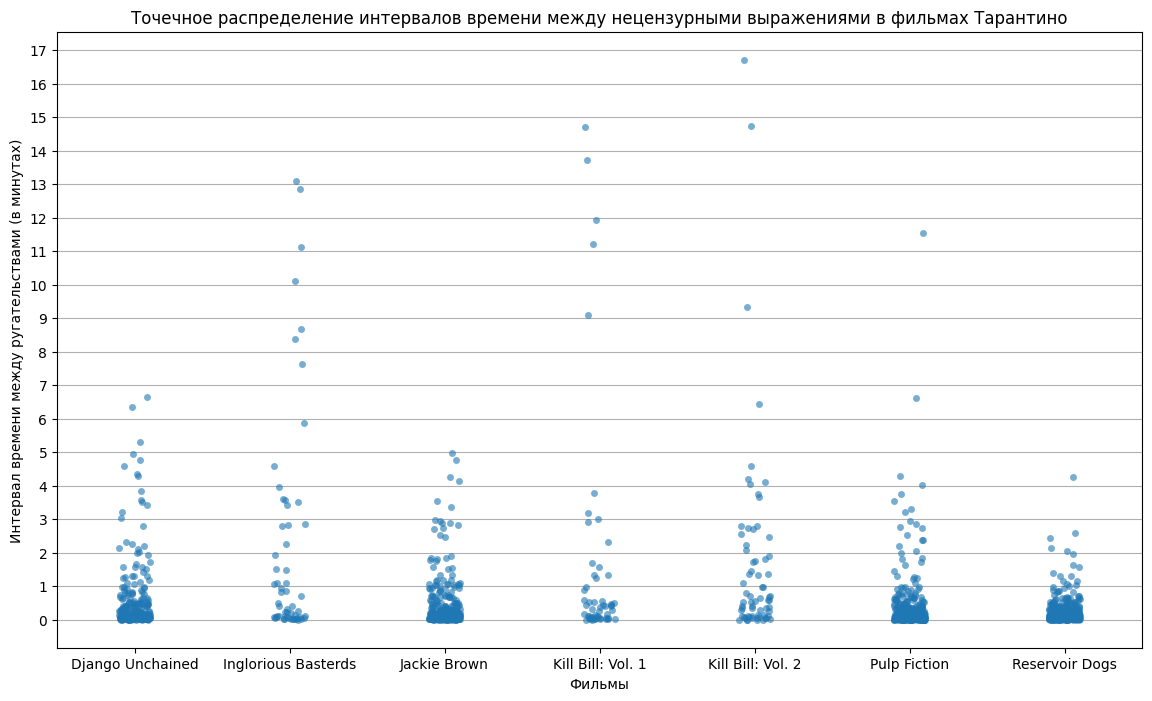

In [14]:
plt.figure(figsize=(14, 8))
sns.stripplot(data=df_by_profane_words, x='movie', y='word_diff', jitter=True, alpha=0.6)

plt.title('Точечное распределение интервалов времени между нецензурными выражениями в фильмах Тарантино')
plt.yticks(range(0, int(df_by_profane_words['word_diff'].max()) + 2, 1))
plt.xlabel('Фильмы')
plt.ylabel('Интервал времени между ругательствами (в минутах)')
plt.grid(axis='y', linestyle='-')
plt.show()

Видно, что скопления большая часть точек достаточно плотно укладываются в минуту, а то и меньше ("Джанго освобожденый", "Джеки Браун", "Криминальное чтиво", "Бешеные псы"). В остальных фильмах мат сильнее "размазан" по времени.

Для каждого из фильмов определим максимальные интервалы, их средние значения и среднее значение по всем представленным картинам Тарантино.

In [15]:
intervals_info = df_by_profane_words.groupby('movie')['word_diff'].agg(['max', 'mean']).round(3).reset_index()
intervals_info = intervals_info.sort_values(by='max', ascending=False)

# к датафрейму снова добавим итоговую строчку, по аналогии, как делали ранее
intervals_total = pd.DataFrame(intervals_info[['max', 'mean']].max()).transpose()
intervals_total['movie'] = 'Total'

intervals_total['mean'] = intervals_total['mean'].mean().round(3)

intervals_info_final = pd.concat([intervals_info, intervals_total], ignore_index=True)

intervals_info_final.index = intervals_info_final.index.map(lambda x: '' if x == intervals_info_final.index[-1] else x)

intervals_info_final

,movie,max,mean
0,Kill Bill: Vol. 2,16.72,1.741
1,Kill Bill: Vol. 1,14.70,1.660
2,Inglorious Basterds,13.10,2.220
3,Pulp Fiction,11.55,0.315
4,Django Unchained,6.65,0.586
5,Jackie Brown,4.97,0.378
6,Reservoir Dogs,4.27,0.226
,Total,16.72,2.220


Итог: самый большой перерыв между матюками - во второй части "Убить Билла" - почти 17 минут. В "Бешеных псах" и вовсе чуть более 4 минут. В этом же фильме ругаются чаще, чем в других. Самые "чистые" в этом смысле "Бесславные ублюдки" - всего лишь 1 словечко на примерно 2 минуты в среднем.